# `ds2s_OV_x0`について基本図を描いてみる

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
import ds2s_OV
import sys

In [2]:
def plot_fundamental(density, flow):
	plt.figure(figsize=(10, 10))
	plt.xlim((0, 1.0))
	plt.ylim((0, 1.0))
	plt.scatter(density, flow, s=3)
	plt.show()

In [3]:
class ds2s_OV_x0(ds2s_OV.ds2s_OV):
	def _next(self):
		self.x[self.n+1] = self.x[self.n] + np.where(
			self._delta() <= self.delta_x[self.n] - self.x_0,
			self._delta(),
			self.delta_x[self.n] - self.x_0
		)
		self._periodic()
		self._update_delta_x(self.n+1)
		self.n += 1
	
	def density(self):
		return super().density() * self.x_0

In [4]:
L = 10.0
n_0 = 5
x_0 = 0.1
v_0 = 0.7
dt = 1.0
dx = 1.0

K =  100, (   0/ 100)

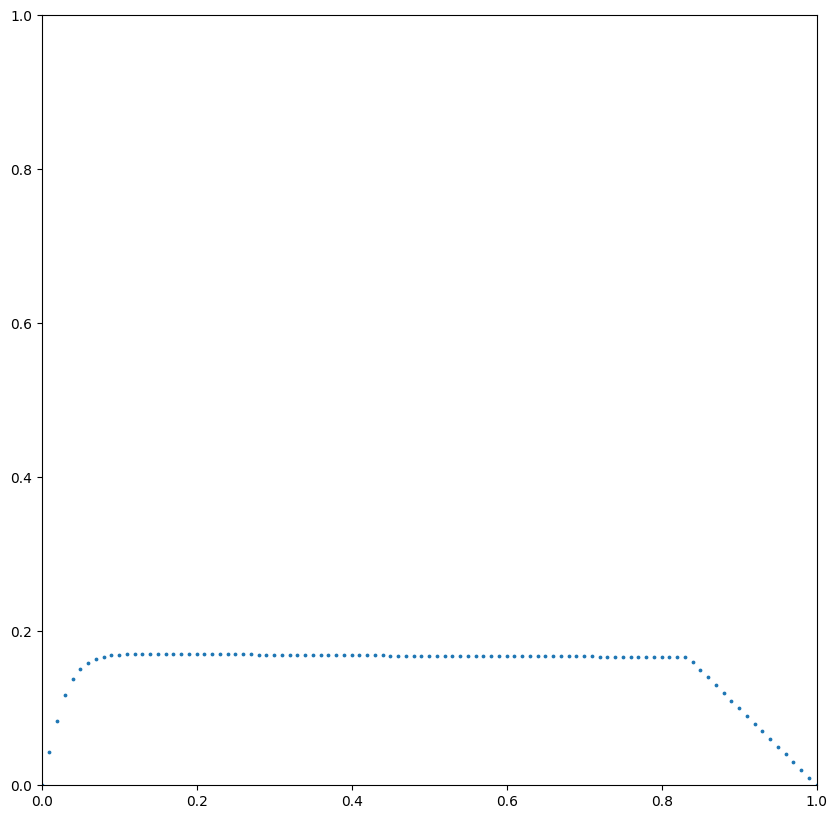

In [5]:
density = []
flow = []
for K in range(101):
	for _ in range(1):
		sys.stdout.write("\rK = {:4d}, ({:4d}/{:4d})".format(K, _, 100))
		sys.stdout.flush()
		x_init = np.array(sorted(random.sample([0.1 * i for i in range(100)], K)))
		model = ds2s_OV_x0(
			L=L,
			K=K,
			n_0=n_0,
			x_0=x_0,
			v_0=v_0,
			dt=dt,
			dx=dx,
			x_init=x_init,
			n_max=1010
		)
		model.simulate()
		density.append(model.density())
		flow.append(model.flow(800, 1000))
plot_fundamental(density, flow)

K =  100, (   0/ 100)

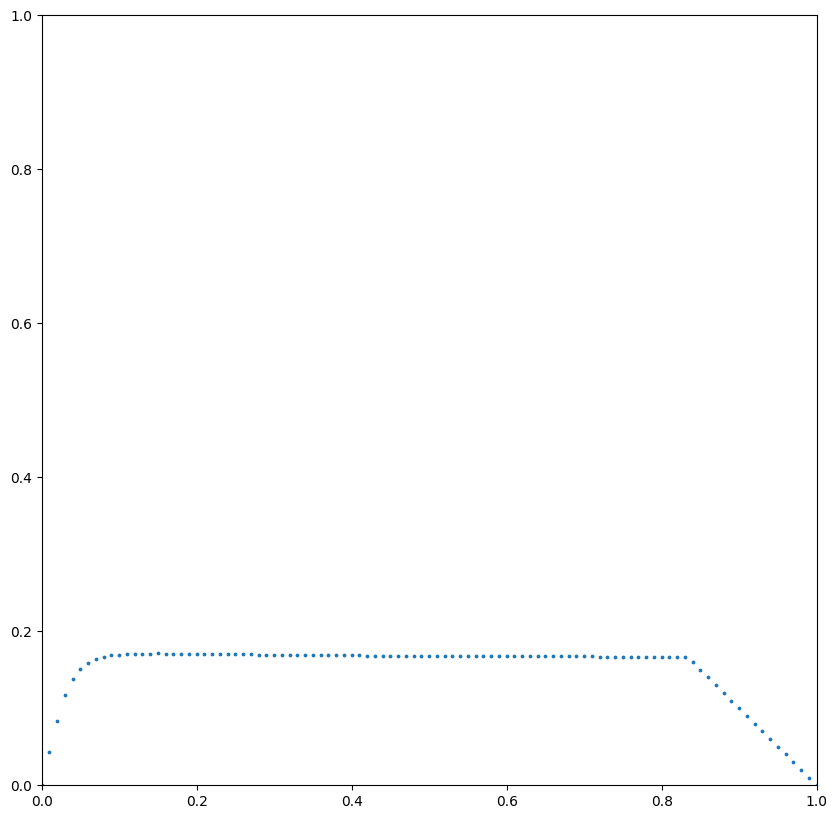

In [8]:
density = []
flow = []
for K in range(101):
	for _ in range(1):
		sys.stdout.write("\rK = {:4d}, ({:4d}/{:4d})".format(K, _, 100))
		sys.stdout.flush()
		x_init = np.array([L / K * i for i in range(K)])
		model = ds2s_OV_x0(
			L=L,
			K=K,
			n_0=n_0,
			x_0=x_0,
			v_0=v_0,
			dt=dt,
			dx=dx,
			x_init=x_init,
			n_max=1010
		)
		model.simulate()
		density.append(model.density())
		flow.append(model.flow(800, 1000))
plot_fundamental(density, flow)


K =  100, ( 100/ 100)

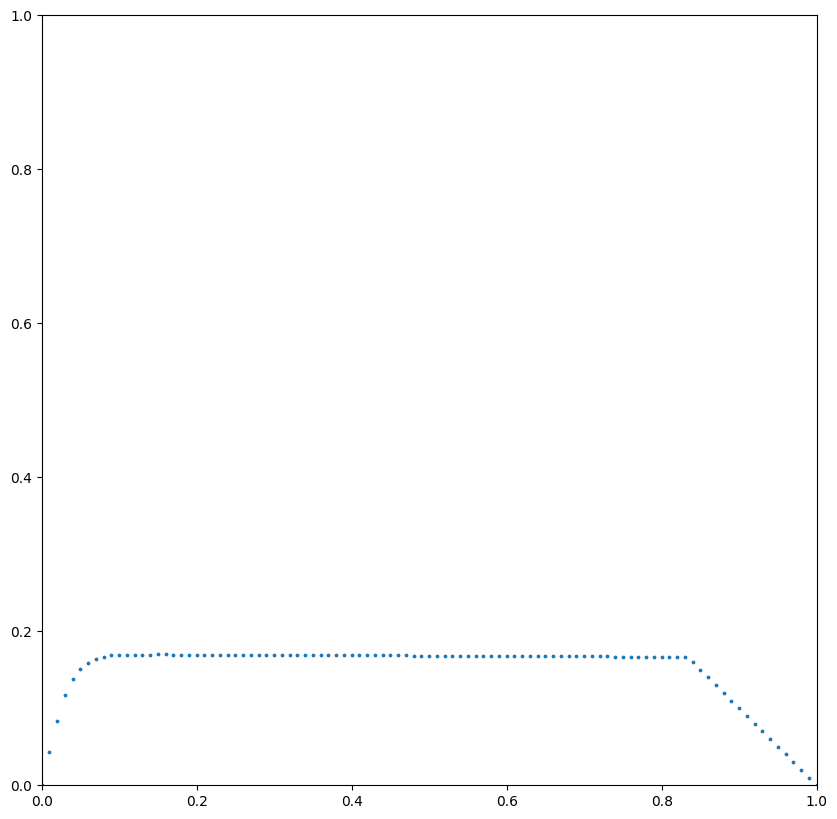

In [6]:
# 渋滞を作る
density, flow = [], []
for K in range(101):
	sys.stdout.write("\rK = {:4d}, ({:4d}/{:4d})".format(K, K, 100))
	sys.stdout.flush()
	x_init = np.array([0.1 * i for i in range(K)])
	model = ds2s_OV_x0(
		L=L,
		K=K,
		n_0=n_0,
		x_0=x_0,
		v_0=v_0,
		dt=dt,
		dx=dx,
		x_init=x_init,
		n_max=1010
	)
	model.simulate()
	density.append(model.density())
	flow.append(model.flow(800, 1000))
plot_fundamental(density, flow)

K =  100, ( 100/ 100)

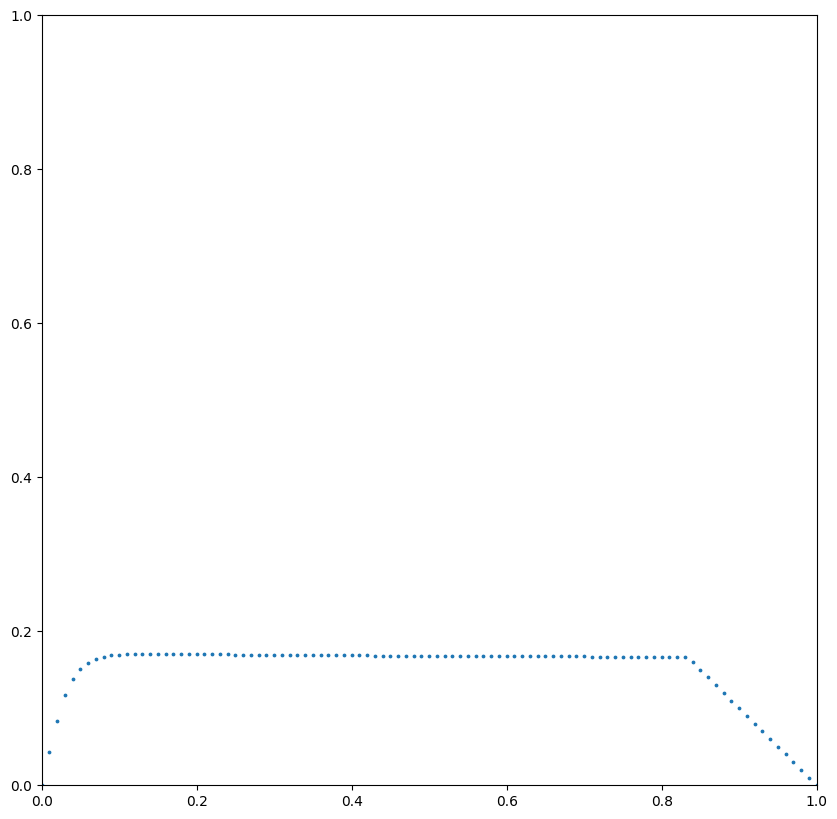

In [11]:
# 渋滞を2つ作る
density, flow = [], []
for K in range(101):
	sys.stdout.write("\rK = {:4d}, ({:4d}/{:4d})".format(K, K, 100))
	sys.stdout.flush()
	x_init = np.array(
		[0.1 * i for i in range(K - K // 2)]
		+ [5.0 + 0.1 * i for i in range(K // 2)]
	)
	model = ds2s_OV_x0(
		L=L,
		K=K,
		n_0=n_0,
		x_0=x_0,
		v_0=v_0,
		dt=dt,
		dx=dx,
		x_init=x_init,
		n_max=1010
	)
	model.simulate()
	density.append(model.density())
	flow.append(model.flow(800, 1000))
plot_fundamental(density, flow)